In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
ds_ncs = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/NCS.csv', sep=',')
ds_ncs = pd.DataFrame(ds_ncs)

ds_pw_cdom = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/PW_CDOM.csv', sep=',')
ds_pw_cdom = pd.DataFrame(ds_pw_cdom)

ds_wc_cdom = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/WC_CDOM.csv', sep=',')
ds_pw_cdom = pd.DataFrame(ds_pw_cdom)

ds_pw_fedoc = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/PW_Fe_DOC.csv', sep=',')
ds_pw_fedoc = pd.DataFrame(ds_pw_fedoc)

ds_wc_fedoc = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/WC_Fe_DOC.csv', sep=',')
ds_wc_fedoc = pd.DataFrame(ds_wc_fedoc)

ds_wc = pd.concat([ds_wc_fedoc, ds_wc_cdom], keys=['TYPE', 'STN', 'Date', 'RGN', 'Depth'])
ds_wc = ds_wc.reset_index(drop=True)

ds_pw = pd.merge(ds_pw_fedoc, ds_pw_cdom, how="outer", on=['TYPE', 'STN', 'Date', 'RGN'])
ds_pw = pd.merge(ds_pw, ds_ncs, how="outer", on=['TYPE', 'STN', 'Date', 'RGN'])

ds_wc = pd.merge(ds_wc_cdom, ds_wc_fedoc, how="outer", on=['TYPE', 'STN', 'Date', 'RGN', 'DEPTH'])

ds_pw['DEPTH'] = 'X'
dspw = ds_pw.drop("TYPE", axis=1)
dswc = ds_wc.drop("TYPE", axis=1)

ds = pd.concat([dswc, dspw], axis = 0)

dspw.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM_pw.csv', index=False, header=True)
dswc.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM_wc.csv', index=False, header=True)
ds.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM.csv', index=False, header=True)


In [3]:
dspw['Date'] = pd.to_datetime(dspw['Date'], format="%m/%d/%Y")
dspw['YearMonth'] = dspw['Date'].dt.to_period('M')

dswc['Date'] = pd.to_datetime(dswc['Date'], format="%m/%d/%Y")
dswc['YearMonth'] = dswc['Date'].dt.to_period('M')

ds['Date'] = pd.to_datetime(ds['Date'], format="%m/%d/%Y")
ds['YearMonth'] = ds['Date'].dt.to_period('M')

In [4]:
# Group by RGN and STN, then calculate the mean of FeT_uM
dspw_grouped = dspw.groupby(['RGN', 'STN', 'YearMonth'])[['FeT_uM', 'DOC_uM', 'acdom_440', 'OS%', 'TC%']].mean().reset_index()

dspw_grouped['FeT_uM_PW'] = dspw_grouped['FeT_uM']
dspw_grouped = dspw_grouped.drop("FeT_uM", axis=1)

dspw_grouped['acdom_440_PW'] = dspw_grouped['acdom_440']
dspw_grouped = dspw_grouped.drop("acdom_440", axis=1)

dspw_grouped['DOC_uM_PW'] = dspw_grouped['DOC_uM']
dspw_grouped = dspw_grouped.drop("DOC_uM", axis=1)

dspw_grouped['OS'] = dspw_grouped['OS%']
dspw_grouped = dspw_grouped.drop("OS%", axis=1)

dspw_grouped['TC'] = dspw_grouped['TC%']
dspw_grouped = dspw_grouped.drop("TC%", axis=1)

dspw_grouped

,RGN,STN,YearMonth,FeT_uM_PW,acdom_440_PW,DOC_uM_PW,OS,TC
0,Central,B_point,2022-06,0.245085,0.801597,545.547579,NaN,NaN
1,Central,S_beach,2022-05,1.419038,-0.515319,503.198583,NaN,NaN
2,Central,TC,2022-11,NaN,44.622098,5961.562500,NaN,NaN
3,Central,TC,2023-07,29.097216,NaN,NaN,0.538169,6.418749
4,Central,VB,2022-11,NaN,1.955034,822.500000,NaN,NaN
5,Central,VB,2023-07,13.657505,1.290650,NaN,NaN,1.846124
6,North,BR2,2023-07,0.795076,NaN,NaN,NaN,0.469871
7,North,SP,2023-01,NaN,1.959916,1516.188079,NaN,NaN
8,North,TV,2023-07,2.560315,NaN,NaN,0.042462,0.954877
9,Offshore,DAY-OFF,2023-09,2.864086,NaN,NaN,NaN,6.516781


In [5]:
# Group by RGN and STN, then calculate the mean of FeT_uM
dswc_grouped = dswc.groupby(['RGN', 'STN', 'YearMonth', 'DEPTH'])[['FeT_uM', 'DOC_uM', 'acdom_440']].mean().reset_index()

dswc_grouped['FeT_uM_WC'] = dswc_grouped['FeT_uM']
dswc_grouped = dswc_grouped.drop("FeT_uM", axis=1)

dswc_grouped['acdom_440_WC'] = dswc_grouped['acdom_440']
dswc_grouped = dswc_grouped.drop("acdom_440", axis=1)

dswc_grouped['DOC_uM_WC'] = dswc_grouped['DOC_uM']
dswc_grouped = dswc_grouped.drop("DOC_uM", axis=1)

dswc_grouped

,RGN,STN,YearMonth,DEPTH,FeT_uM_WC,acdom_440_WC,DOC_uM_WC
0,Central,B_point,2022-06,B,0.120128,1.430193,291.708333
1,Central,B_point,2022-06,S,0.089385,1.580384,285.625000
2,Central,S_beach,2022-05,B,0.663319,0.058024,154.708333
3,Central,S_beach,2022-05,S,0.453166,0.194146,325.625000
4,Central,TC,2022-11,S,1.322752,2.910127,821.833333
...,...,...,...,...,...,...,...
84,St.Lucie,SF,2023-07,B,NaN,1.002675,NaN
85,St.Lucie,SF,2023-07,S,0.744371,0.969779,NaN
86,St.Lucie,SF2,2023-07,B,4.636370,0.026236,NaN
87,St.Lucie,SF2,2023-07,S,2.668041,1.212531,NaN


In [6]:
ds_avg = pd.merge(dswc_grouped, dspw_grouped, how="outer", on=['RGN', 'STN', 'YearMonth'])

ds_avg.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM_avg.csv', index=False, header=True)

ds_avg

,RGN,STN,YearMonth,DEPTH,FeT_uM_WC,acdom_440_WC,DOC_uM_WC,FeT_uM_PW,acdom_440_PW,DOC_uM_PW,OS,TC
0,Central,B_point,2022-06,B,0.120128,1.430193,291.708333,0.245085,0.801597,545.547579,NaN,NaN
1,Central,B_point,2022-06,S,0.089385,1.580384,285.625000,0.245085,0.801597,545.547579,NaN,NaN
2,Central,S_beach,2022-05,B,0.663319,0.058024,154.708333,1.419038,-0.515319,503.198583,NaN,NaN
3,Central,S_beach,2022-05,S,0.453166,0.194146,325.625000,1.419038,-0.515319,503.198583,NaN,NaN
4,Central,TC,2022-11,S,1.322752,2.910127,821.833333,NaN,44.622098,5961.562500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88,St.Lucie,SLE,2022-11,S,0.698067,2.537821,631.125000,NaN,2.519969,625.750000,NaN,NaN
89,St.Lucie,SF,2023-10,NaN,NaN,NaN,NaN,52.441177,17.963400,NaN,1.402728,11.031834
90,St.Lucie,SF-1.1,2023-10,NaN,NaN,NaN,NaN,27.902264,10.363500,NaN,1.289014,11.623375
91,St.Lucie,SF-1.2,2023-10,NaN,NaN,NaN,NaN,5.214612,9.212000,NaN,NaN,1.180073


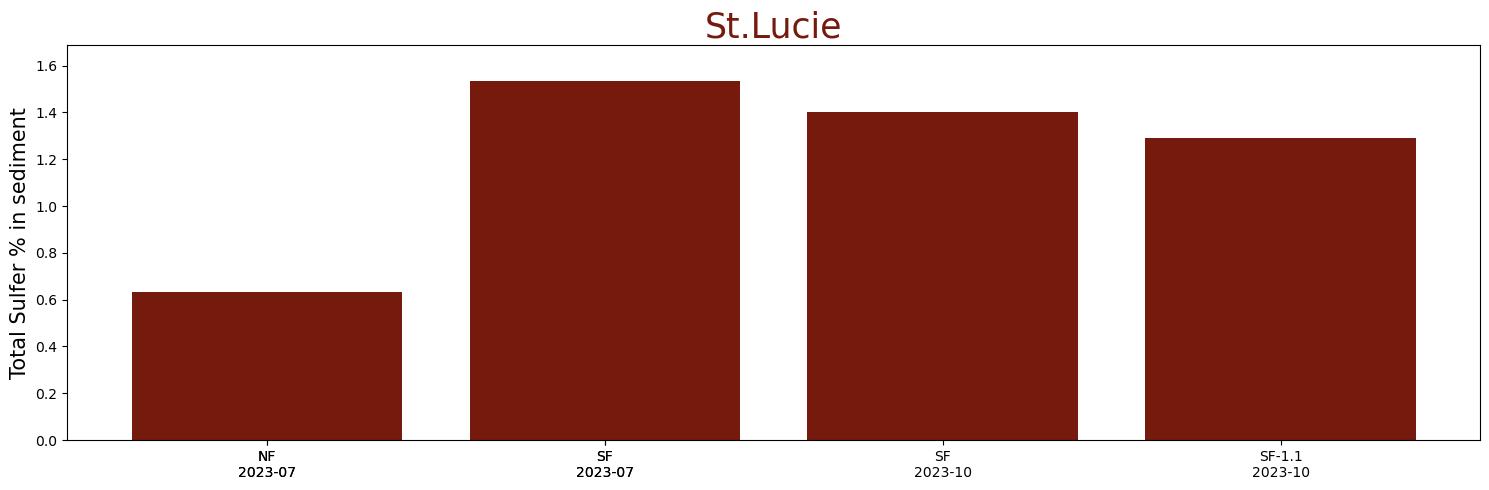

In [7]:
choice = 'OS'
name = f'Total Sulfer % in sediment'

rgn_order = [ 'St.Lucie']
colors = ['#751a0c']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_Sulfur.png', format='png')
plt.show()

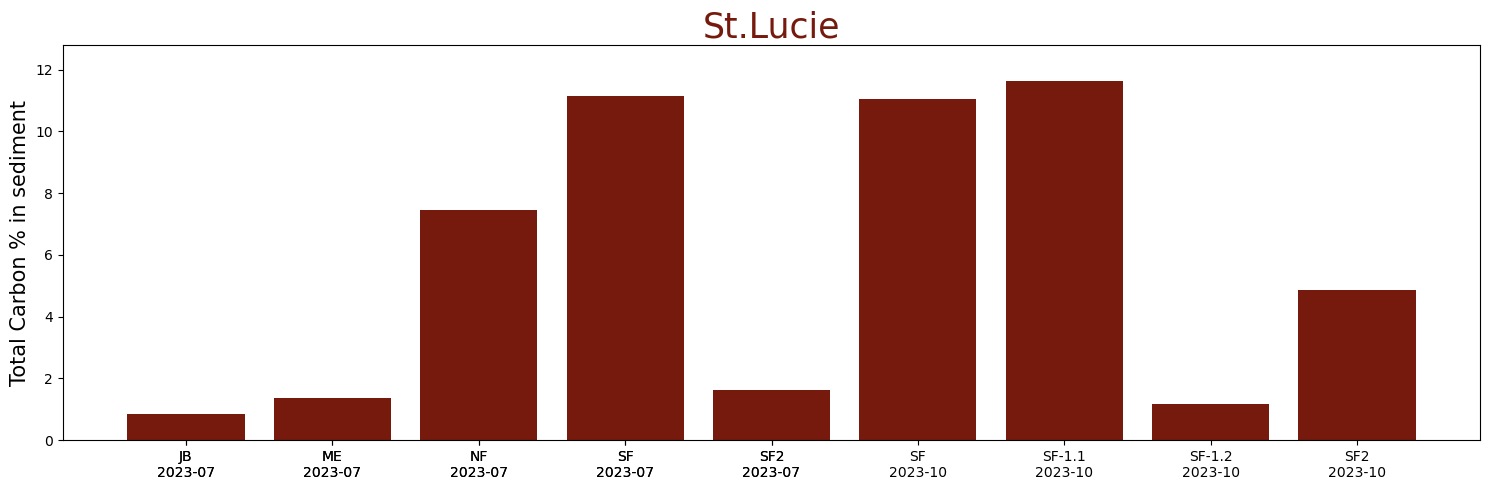

In [8]:
choice = 'TC'
name = f'Total Carbon % in sediment'

rgn_order = [ 'St.Lucie']
colors = [ '#751a0c']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_Carbon.png', format='png')
plt.show()

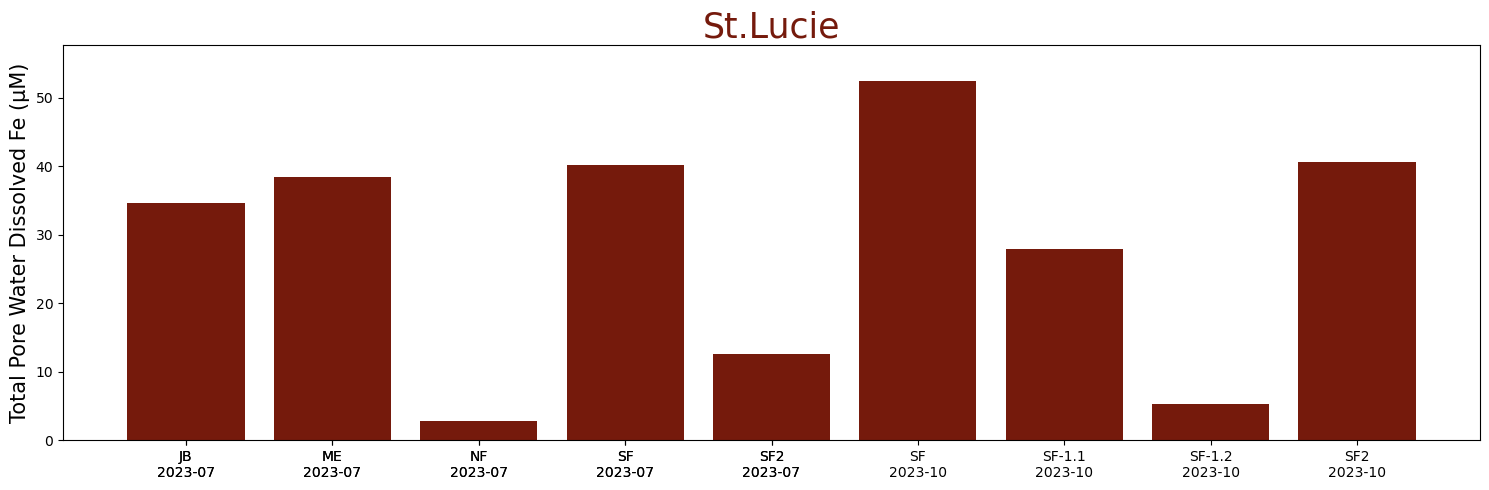

In [9]:
choice = 'FeT_uM_PW'
name = f'Total Pore Water Dissolved Fe (µM)'

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_pw_Fe.png', format='png')
plt.show()

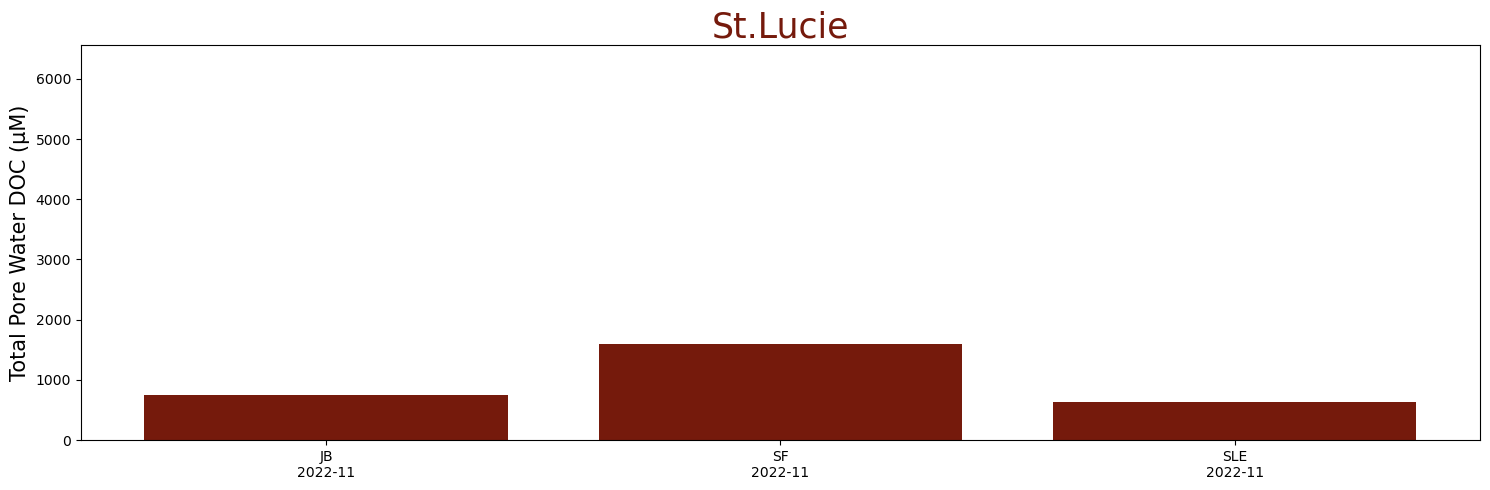

In [10]:
choice = 'DOC_uM_PW'
name = f'Total Pore Water DOC (µM)'


N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_pw_DOC.png', format='png')
plt.show()

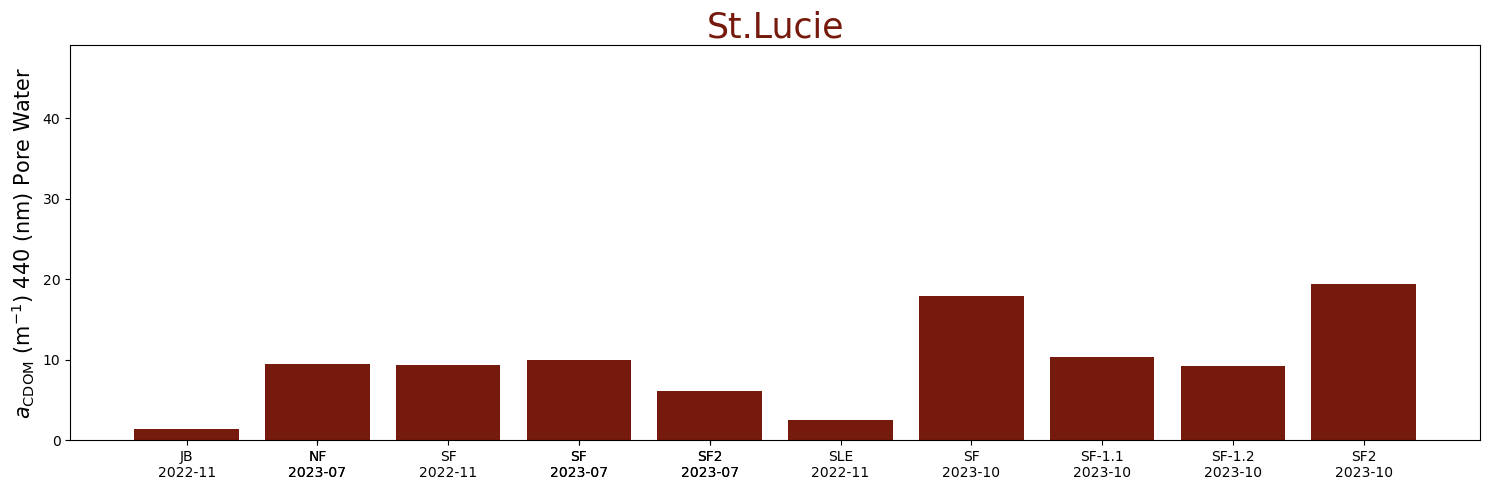

In [11]:
choice = 'acdom_440_PW'
name = r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Pore Water'


N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_pw_CDOM.png', format='png')
plt.show()

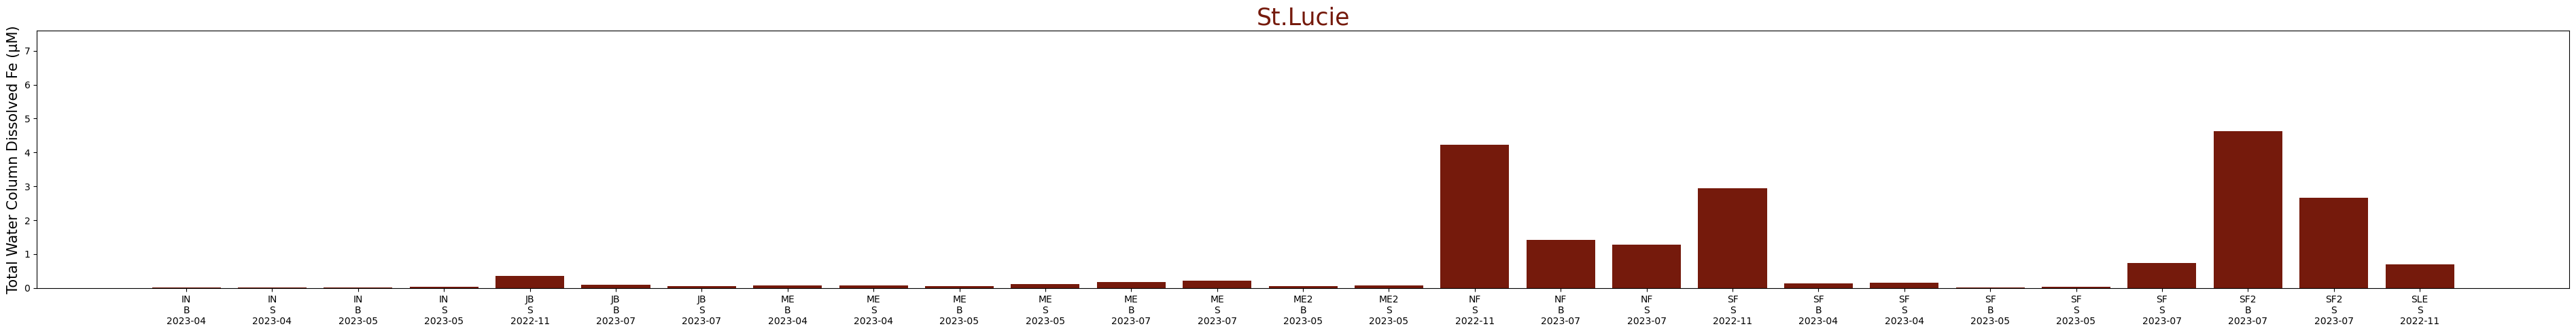

In [12]:
choice = 'FeT_uM_WC'
name = f'Total Water Column Dissolved Fe (µM)'


N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = N_width + C_width + S_width 

fig, axes = plt.subplots(1, 1, figsize=(38, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) + '_' + sub_df['DEPTH']

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    dep = sub_df['DEPTH']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{x}\n{d}' for s, x, d in zip(stn, dep, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_wc_Fe.png', format='png')
plt.show()

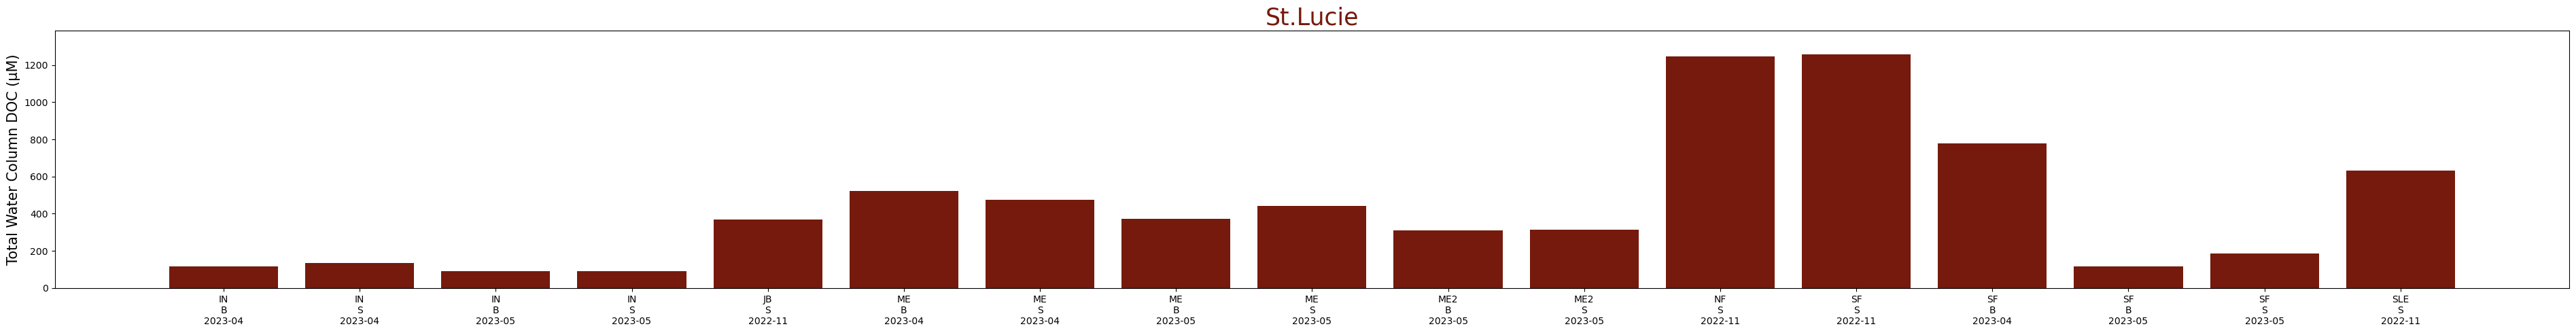

24


In [13]:
choice = 'DOC_uM_WC'
name = f'Total Water Column DOC (µM)'


N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = N_width + C_width + S_width 

fig, axes = plt.subplots(1, 1, figsize=(38, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) + '_' + sub_df['DEPTH']

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    dep = sub_df['DEPTH']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{x}\n{d}' for s, x, d in zip(stn, dep, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_wc_DOC.png', format='png')
plt.show()
print(width)

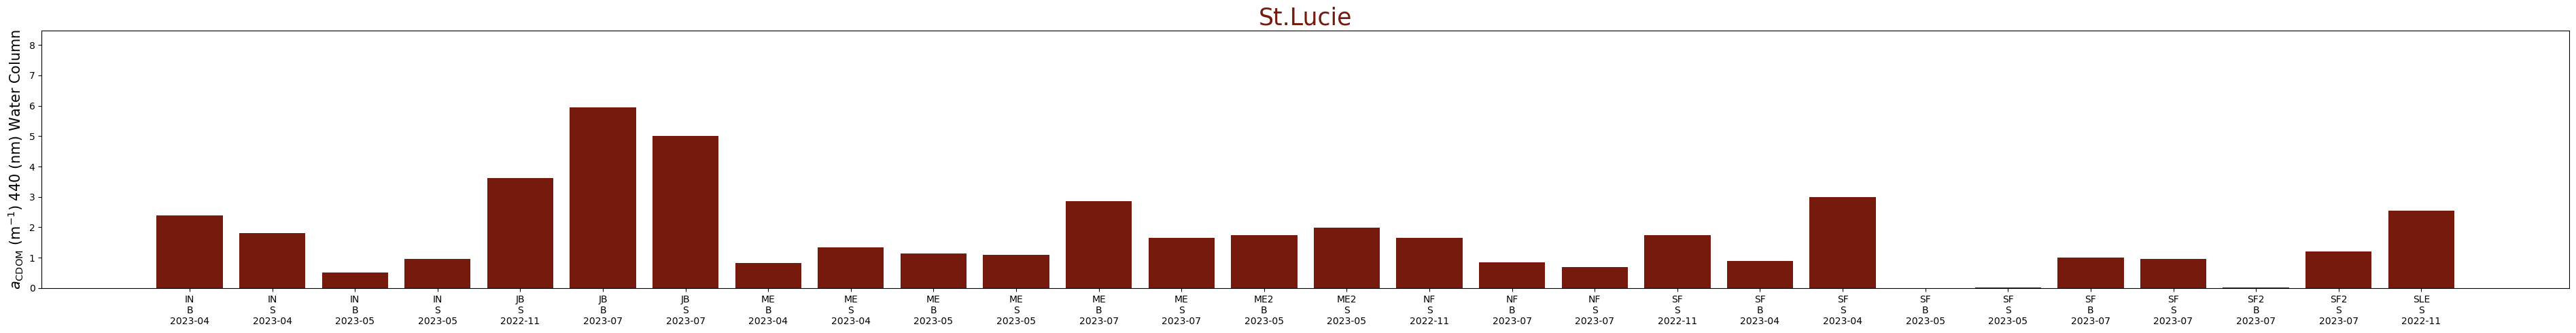

51


In [14]:
choice = 'acdom_440_WC'
name = r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column'


N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = N_width + C_width + S_width 

fig, axes = plt.subplots(1, 1, figsize=(38, 5), sharey=True)

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) + '_' + sub_df['DEPTH']

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    dep = sub_df['DEPTH']
    
    ax = axes

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{x}\n{d}' for s, x, d in zip(stn, dep, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../HALO/Figures/Bar_wc_CDOM.png', format='png')
plt.show()
print(width)
